In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")


In [2]:
df=pd.read_csv(r"/Users/priyankamalavade/Desktop/Ecommerce_Performance_Analysis/data/cleaned_ecommerce_data.csv")

In [3]:
print(f"Dataset columns: {list(df.columns)}")


Dataset columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue', 'Total_Pages', 'Total_Duration', 'Avg_Time_Per_Page']


In [4]:
# Calculate main KPIs
total_sessions = len(df)
total_users = df['VisitorType'].count() if 'VisitorType' in df.columns else len(df)
conversion_rate = (df['Revenue'].sum() / len(df) * 100) if 'Revenue' in df.columns else 0


In [5]:
# Calculate bounce rate (sessions with only 1 page and exit rate = bounce rate)
bounce_rate = df['BounceRates'].mean() * 100 if 'BounceRates' in df.columns else 0

# Calculate average session duration
avg_session_duration = df['Total_Duration'].mean() if 'Total_Duration' in df.columns else 0

# Calculate page views
total_page_views = df['Total_Pages'].sum() if 'Total_Pages' in df.columns else 0

# Calculate pages per session
pages_per_session = df['Total_Pages'].mean() if 'Total_Pages' in df.columns else 0


In [6]:
print(f"• Total Sessions: {total_sessions:,}")
print(f"• Total Users: {total_users:,}")
print(f"• Total Page Views: {total_page_views:,.0f}")
print(f"• Conversion Rate: {conversion_rate:.2f}%")
print(f"• Bounce Rate: {bounce_rate:.2f}%")
print(f"• Avg Session Duration: {avg_session_duration:.2f} seconds")
print(f"• Pages per Session: {pages_per_session:.2f}")


• Total Sessions: 12,330
• Total Users: 12,330
• Total Page Views: 426,004
• Conversion Rate: 15.47%
• Bounce Rate: 2.22%
• Avg Session Duration: 1310.04 seconds
• Pages per Session: 34.55


In [7]:
# Visitor Type Analysis
if 'VisitorType' in df.columns:
    visitor_analysis = df.groupby('VisitorType').agg({
        'Revenue': 'sum',
        'Total_Pages': 'mean',
        'Total_Duration': 'mean',
        'BounceRates': 'mean',
        'ExitRates': 'mean'
    }).round(2)
    
    print("Visitor Type Performance:")
    print(visitor_analysis)


Visitor Type Performance:
                   Revenue  Total_Pages  Total_Duration  BounceRates  \
VisitorType                                                            
New_Visitor            422        20.94          747.54         0.01   
Other                   16        14.12          644.79         0.04   
Returning_Visitor     1470        36.90         1405.71         0.02   

                   ExitRates  
VisitorType                   
New_Visitor             0.02  
Other                   0.06  
Returning_Visitor       0.05  


In [8]:
# Weekend vs Weekday Analysis
if 'Weekend' in df.columns:
    weekend_analysis = df.groupby('Weekend').agg({
        'Revenue': ['count', 'sum', 'mean'],
        'Total_Pages': 'mean',
        'Total_Duration': 'mean',
        'BounceRates': 'mean'
    }).round(2)
    
    weekend_analysis.columns = ['Sessions', 'Conversions', 'Conv_Rate', 'Avg_Pages', 'Avg_Duration', 'Bounce_Rate']
    
    print("\nWeekend vs Weekday Performance:")
    print(weekend_analysis)



Weekend vs Weekday Performance:
         Sessions  Conversions  Conv_Rate  Avg_Pages  Avg_Duration  \
Weekend                                                              
False        9462         1409       0.15      34.08       1299.01   
True         2868          499       0.17      36.09       1346.42   

         Bounce_Rate  
Weekend               
False           0.02  
True            0.02  


In [9]:
if 'OperatingSystems' in df.columns:
    os_performance = df.groupby('OperatingSystems').agg({
        'Revenue': ['count', 'sum'],
        'Total_Duration': 'mean',
        'BounceRates': 'mean'
    }).round(2)
    
    os_performance.columns = ['Sessions', 'Conversions', 'Avg_Duration', 'Bounce_Rate']
    os_performance = os_performance.sort_values('Sessions', ascending=False).head(10)
    
    print("Top 10 Operating Systems by Sessions:")
    print(os_performance)


Top 10 Operating Systems by Sessions:
                  Sessions  Conversions  Avg_Duration  Bounce_Rate
OperatingSystems                                                  
2                     6601         1155       1525.61         0.02
1                     2585          379        983.51         0.03
3                     2555          268       1094.46         0.03
4                      478           85       1366.30         0.01
8                       79           17        715.41         0.03
6                       19            2       1118.35         0.04
7                        7            1       1079.12         0.04
5                        6            1        849.13         0.01


In [10]:
if 'Browser' in df.columns:
    browser_performance = df.groupby('Browser').agg({
        'Revenue': ['count', 'sum'],
        'Total_Duration': 'mean'
    }).round(2)
    
    browser_performance.columns = ['Sessions', 'Conversions', 'Avg_Duration']
    browser_performance = browser_performance.sort_values('Sessions', ascending=False).head(10)
    
    print("\nTop 10 Browsers by Sessions:")
    print(browser_performance)


Top 10 Browsers by Sessions:
         Sessions  Conversions  Avg_Duration
Browser                                     
2            7961         1223       1433.52
1            2462          365       1010.26
4             736          130       1253.28
5             467           86       1272.81
6             174           20       1313.17
10            163           32       1334.75
8             135           21        689.34
3             105            5        797.69
13             61           16        777.82
7              49            6       1047.31


In [11]:
if 'Region' in df.columns:
    region_performance = df.groupby('Region').agg({
        'Revenue': ['count', 'sum', 'mean'],
        'Total_Pages': 'mean',
        'Total_Duration': 'mean'
    }).round(2)
    
    region_performance.columns = ['Sessions', 'Conversions', 'Conv_Rate', 'Avg_Pages', 'Avg_Duration']
    region_performance = region_performance.sort_values('Sessions', ascending=False).head(10)
    
    print("Top 10 Regions by Sessions:")
    print(region_performance)


Top 10 Regions by Sessions:
        Sessions  Conversions  Conv_Rate  Avg_Pages  Avg_Duration
Region                                                           
1           4780          771       0.16      36.62       1393.04
3           2403          349       0.15      35.04       1306.64
4           1182          175       0.15      33.02       1232.97
2           1136          188       0.17      33.28       1305.33
6            805          112       0.14      30.40       1133.74
7            761          119       0.16      34.26       1247.82
9            511           86       0.17      31.64       1213.38
8            434           56       0.13      29.66       1218.20
5            318           52       0.16      32.53       1267.29


In [12]:
if 'Month' in df.columns:
    monthly_performance = df.groupby('Month').agg({
        'Revenue': ['count', 'sum'],
        'Total_Pages': 'mean',
        'Total_Duration': 'mean',
        'BounceRates': 'mean'
    }).round(2)
    
    monthly_performance.columns = ['Sessions', 'Conversions', 'Avg_Pages', 'Avg_Duration', 'Bounce_Rate']
    
    print("Monthly Performance:")
    print(monthly_performance)

Monthly Performance:
       Sessions  Conversions  Avg_Pages  Avg_Duration  Bounce_Rate
Month                                                             
Aug         433           76      41.94       1414.89         0.02
Dec        1727          216      30.70       1228.17         0.02
Feb         184            3      11.82        490.27         0.05
Jul         432           66      39.35       1342.00         0.02
June        288           29      38.90       1292.96         0.04
Mar        1907          192      22.12        914.19         0.02
May        3364          365      28.88       1078.53         0.03
Nov        2998          760      49.30       1892.97         0.02
Oct         549          115      37.77       1281.58         0.01
Sep         448           86      37.01       1398.45         0.01


In [13]:
if all(col in df.columns for col in ['Administrative', 'Informational', 'ProductRelated']):
    page_type_stats = pd.DataFrame({
        'Administrative': [df['Administrative'].mean(), df['Administrative_Duration'].mean()],
        'Informational': [df['Informational'].mean(), df['Informational_Duration'].mean()],
        'ProductRelated': [df['ProductRelated'].mean(), df['ProductRelated_Duration'].mean()]
    }, index=['Avg_Pages', 'Avg_Duration'])
    
    print("Page Type Statistics:")
    print(page_type_stats.round(2))

Page Type Statistics:
              Administrative  Informational  ProductRelated
Avg_Pages               2.32           0.50           31.73
Avg_Duration           80.82          34.47         1194.75


In [14]:
# Create user segments based on behavior
def categorize_user(row):
    if row['Total_Pages'] >= 10 and row['Total_Duration'] >= 1000:
        return 'High_Engagement'
    elif row['Total_Pages'] >= 5 or row['Total_Duration'] >= 500:
        return 'Medium_Engagement'
    else:
        return 'Low_Engagement'


In [15]:
if 'Total_Pages' in df.columns and 'Total_Duration' in df.columns:
    df['User_Segment'] = df.apply(categorize_user, axis=1)
    
    segment_analysis = df.groupby('User_Segment').agg({
        'Revenue': ['count', 'sum', 'mean'],
        'BounceRates': 'mean',
        'ExitRates': 'mean',
        'PageValues': 'mean'
    }).round(3)
    
    segment_analysis.columns = ['Sessions', 'Conversions', 'Conv_Rate', 'Bounce_Rate', 'Exit_Rate', 'Avg_Page_Value']
    
    print("User Segment Performance:")
    print(segment_analysis)


User Segment Performance:
                   Sessions  Conversions  Conv_Rate  Bounce_Rate  Exit_Rate  \
User_Segment                                                                  
High_Engagement        4676         1097      0.235        0.008      0.022   
Low_Engagement         1648           47      0.029        0.095      0.131   
Medium_Engagement      6006          764      0.127        0.013      0.035   

                   Avg_Page_Value  
User_Segment                       
High_Engagement             8.785  
Low_Engagement              0.645  
Medium_Engagement           5.074  


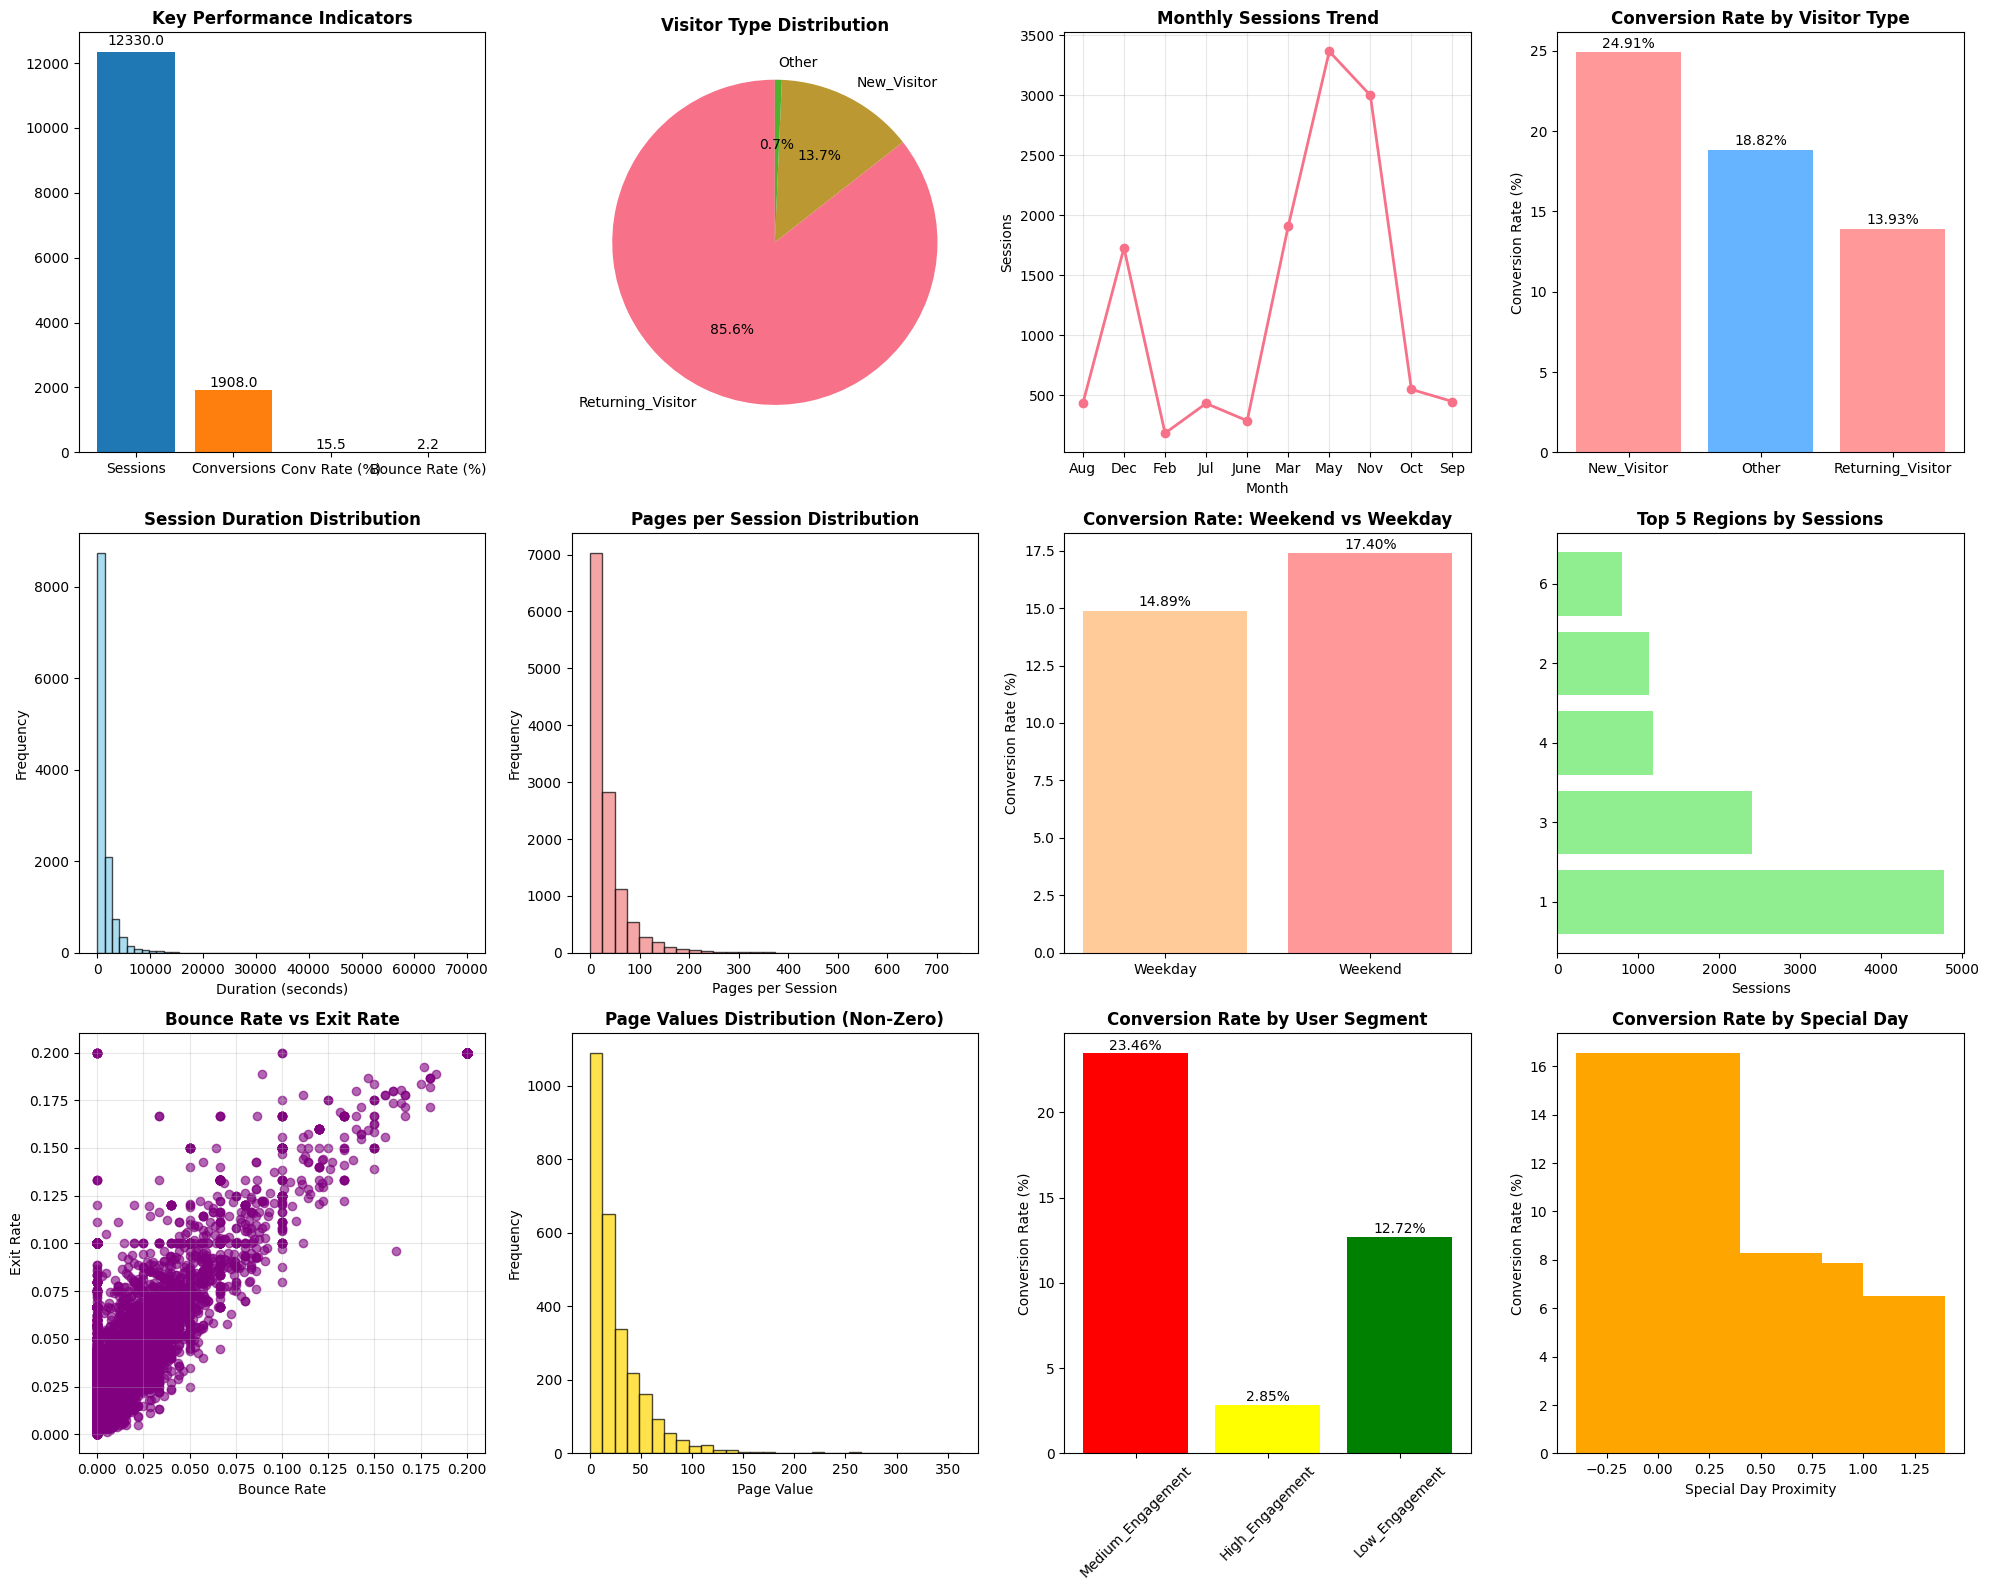

In [16]:
# Create comprehensive visualization dashboard
fig = plt.figure(figsize=(20, 16))

# 1. KPI Overview
ax1 = plt.subplot(3, 4, 1)
kpis = ['Sessions', 'Conversions', 'Conv Rate (%)', 'Bounce Rate (%)']
kpi_values = [total_sessions, df['Revenue'].sum() if 'Revenue' in df.columns else 0, 
              conversion_rate, bounce_rate]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = ax1.bar(kpis, kpi_values, color=colors)
ax1.set_title('Key Performance Indicators', fontweight='bold')
for bar, value in zip(bars, kpi_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{value:.1f}', ha='center', va='bottom')

# 2. Visitor Type Distribution
if 'VisitorType' in df.columns:
    ax2 = plt.subplot(3, 4, 2)
    visitor_counts = df['VisitorType'].value_counts()
    ax2.pie(visitor_counts.values, labels=visitor_counts.index, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Visitor Type Distribution', fontweight='bold')

# 3. Monthly Sessions Trend
if 'Month' in df.columns:
    ax3 = plt.subplot(3, 4, 3)
    monthly_sessions = df['Month'].value_counts().sort_index()
    ax3.plot(monthly_sessions.index, monthly_sessions.values, marker='o', linewidth=2, markersize=6)
    ax3.set_title('Monthly Sessions Trend', fontweight='bold')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Sessions')
    ax3.grid(True, alpha=0.3)

# 4. Conversion Rate by Visitor Type
if 'VisitorType' in df.columns and 'Revenue' in df.columns:
    ax4 = plt.subplot(3, 4, 4)
    conv_by_visitor = df.groupby('VisitorType')['Revenue'].mean() * 100
    bars = ax4.bar(conv_by_visitor.index, conv_by_visitor.values, color=['#ff9999', '#66b3ff'])
    ax4.set_title('Conversion Rate by Visitor Type', fontweight='bold')
    ax4.set_ylabel('Conversion Rate (%)')
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:.2f}%', ha='center', va='bottom')

# 5. Session Duration Distribution
if 'Total_Duration' in df.columns:
    ax5 = plt.subplot(3, 4, 5)
    ax5.hist(df['Total_Duration'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    ax5.set_title('Session Duration Distribution', fontweight='bold')
    ax5.set_xlabel('Duration (seconds)')
    ax5.set_ylabel('Frequency')

# 6. Pages per Session Distribution
if 'Total_Pages' in df.columns:
    ax6 = plt.subplot(3, 4, 6)
    ax6.hist(df['Total_Pages'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    ax6.set_title('Pages per Session Distribution', fontweight='bold')
    ax6.set_xlabel('Pages per Session')
    ax6.set_ylabel('Frequency')

# 7. Weekend vs Weekday Performance
if 'Weekend' in df.columns:
    ax7 = plt.subplot(3, 4, 7)
    weekend_conv = df.groupby('Weekend')['Revenue'].mean() * 100 if 'Revenue' in df.columns else [0, 0]
    weekend_labels = ['Weekday', 'Weekend']
    bars = ax7.bar(weekend_labels, weekend_conv, color=['#ffcc99', '#ff9999'])
    ax7.set_title('Conversion Rate: Weekend vs Weekday', fontweight='bold')
    ax7.set_ylabel('Conversion Rate (%)')
    for bar, value in zip(bars, weekend_conv):
        height = bar.get_height()
        ax7.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{value:.2f}%', ha='center', va='bottom')

# 8. Top Regions Performance
if 'Region' in df.columns:
    ax8 = plt.subplot(3, 4, 8)
    top_regions = df['Region'].value_counts().head(5)
    ax8.barh(range(len(top_regions)), top_regions.values, color='lightgreen')
    ax8.set_yticks(range(len(top_regions)))
    ax8.set_yticklabels(top_regions.index)
    ax8.set_title('Top 5 Regions by Sessions', fontweight='bold')
    ax8.set_xlabel('Sessions')

# 9. Bounce Rate vs Exit Rate Correlation
if 'BounceRates' in df.columns and 'ExitRates' in df.columns:
    ax9 = plt.subplot(3, 4, 9)
    ax9.scatter(df['BounceRates'], df['ExitRates'], alpha=0.6, color='purple')
    ax9.set_title('Bounce Rate vs Exit Rate', fontweight='bold')
    ax9.set_xlabel('Bounce Rate')
    ax9.set_ylabel('Exit Rate')
    ax9.grid(True, alpha=0.3)

# 10. Page Value Distribution
if 'PageValues' in df.columns:
    ax10 = plt.subplot(3, 4, 10)
    non_zero_page_values = df[df['PageValues'] > 0]['PageValues']
    if len(non_zero_page_values) > 0:
        ax10.hist(non_zero_page_values, bins=30, alpha=0.7, color='gold', edgecolor='black')
        ax10.set_title('Page Values Distribution (Non-Zero)', fontweight='bold')
        ax10.set_xlabel('Page Value')
        ax10.set_ylabel('Frequency')
    else:
        ax10.text(0.5, 0.5, 'No Page Values > 0', ha='center', va='center', fontsize=12)
        ax10.set_title('Page Values Distribution', fontweight='bold')

# 11. User Segment Performance
if 'User_Segment' in df.columns:
    ax11 = plt.subplot(3, 4, 11)
    segment_conv = df.groupby('User_Segment')['Revenue'].mean() * 100 if 'Revenue' in df.columns else [0, 0, 0]
    segment_names = df['User_Segment'].value_counts().index
    bars = ax11.bar(segment_names, segment_conv, color=['red', 'yellow', 'green'])
    ax11.set_title('Conversion Rate by User Segment', fontweight='bold')
    ax11.set_ylabel('Conversion Rate (%)')
    ax11.tick_params(axis='x', rotation=45)
    for bar, value in zip(bars, segment_conv):
        height = bar.get_height()
        ax11.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{value:.2f}%', ha='center', va='bottom')

# 12. Special Day Impact
if 'SpecialDay' in df.columns:
    ax12 = plt.subplot(3, 4, 12)
    special_day_conv = df.groupby('SpecialDay')['Revenue'].mean() * 100 if 'Revenue' in df.columns else [0]
    special_day_labels = df['SpecialDay'].value_counts().index
    ax12.bar(special_day_labels, special_day_conv, color='orange')
    ax12.set_title('Conversion Rate by Special Day', fontweight='bold')
    ax12.set_xlabel('Special Day Proximity')
    ax12.set_ylabel('Conversion Rate (%)')

plt.tight_layout()
plt.show()

In [17]:
summary_stats = pd.DataFrame({
    'Metric': ['Total Sessions', 'Total Users', 'Conversion Rate (%)', 'Bounce Rate (%)', 
               'Avg Session Duration (sec)', 'Pages per Session', 'Revenue Sessions'],
    'Value': [total_sessions, total_users, conversion_rate, bounce_rate, 
              avg_session_duration, pages_per_session, df['Revenue'].sum() if 'Revenue' in df.columns else 0]
})


In [18]:
print(summary_stats.to_string(index=False))

                    Metric        Value
            Total Sessions 12330.000000
               Total Users 12330.000000
       Conversion Rate (%)    15.474453
           Bounce Rate (%)     2.219138
Avg Session Duration (sec)  1310.037228
         Pages per Session    34.550203
          Revenue Sessions  1908.000000


In [19]:
summary_data = {
    'total_sessions': total_sessions,
    'conversion_rate': conversion_rate,
    'bounce_rate': bounce_rate,
    'avg_duration': avg_session_duration
}


In [20]:
print(f"\n Summary data prepared for next notebook: {summary_data}")


 Summary data prepared for next notebook: {'total_sessions': 12330, 'conversion_rate': np.float64(15.474452554744525), 'bounce_rate': np.float64(2.2191380470721818), 'avg_duration': np.float64(1310.0372284358857)}
